In [1]:
from sklearn import datasets  #自带数据集
from sklearn.model_selection import train_test_split,cross_val_score  #划分数据 交叉验证
from sklearn.neighbors import KNeighborsClassifier  #一个简单的模型，只有K一个参数，类似K-means
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris() #加载sklearn自带的数据集
X = iris.data #这是数据
y = iris.target #这是每个数据所对应的标签
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=1/3,random_state=3) #这里划分数据以1/3的来划分 训练集训练结果 测试集测试结果
k_range = range(1,31) #1-30

In [6]:
cv_scores = [] #用来放每个模型的结果值

In [7]:
for n in k_range:
    knn = KNeighborsClassifier(n)   
    # knn模型，这里一个超参数可以做预测，当多个超参数时需要使用另一种方法GridSearchCV
    scores = cross_val_score(knn,train_X,train_y,cv=10,scoring='accuracy')  
    # cv：选择每次测试折数  accuracy：评价指标是准确度,可以省略使用默认值
    cv_scores.append(scores.mean())


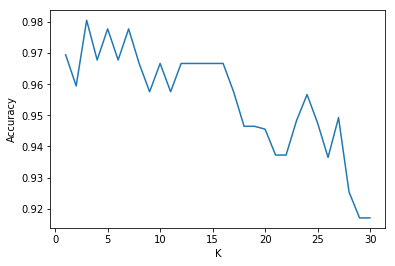

In [10]:
plt.plot(k_range,cv_scores)
plt.xlabel('K')
plt.ylabel('Accuracy') #通过图像选择最好的参数
plt.show()

In [11]:
best_knn = KNeighborsClassifier(n_neighbors=3)# 选择最优的K=3传入模型
best_knn.fit(train_X,train_y) #训练模型
print(best_knn.score(test_X,test_y)) #看看评分

0.94
